# **Lista 3**

# Gabriel Benfatti de Campos
# Vinícius Araújo Beltrami


In [102]:
# setup
###############################
import pandas as pd
import numpy
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import cluster, neighbors, preprocessing, metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

drive.mount('/content/drive')


# definicao de funcoes
##############################

# retorna colunas selecionadas
def column_select(df, col):
  return df[col]

# separaçao da base em train e test (x, y)
def train_test(df, frac, answer_col):
  train_X = df.sample(frac=frac, random_state=1)
  test_X = pd.concat([df, train_X]).drop_duplicates(keep=False)
  train_Y = train_X[answer_col]
  test_Y = test_X[answer_col]
  del train_X[answer_col]
  del test_X[answer_col]

  return train_X, train_Y, test_X,  test_Y

# plota heat map
def plot_heatmap(true_label, ia_label, class_names):
  # Calcule a matriz de confusão
  conf_matrix = confusion_matrix(true_label, ia_label)
  # Crie o gráfico de calor com os nomes das classes
  plt.figure(figsize=(6, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Rótulos Previstos')
  plt.ylabel('Rótulos Reais')
  plt.show()

# pre processamento (NÃO funciona tao bem quanto o esperado!!)
def pre_proc(df, answer_col):
  # save last column
  x=df.pop(answer_col)

  # PCA
  pca = PCA(n_components=3)
  df_fited = pca.fit_transform(df)

  #Reescalomento via Standarlization (N(0,1))
  rs = RobustScaler()
  df_fited = rs.fit_transform(df_fited)

  df=pd.DataFrame(df_fited)
  df=pd.concat([df,x], axis=1)

  # drop dupli
  df = df.drop_duplicates(keep='first')

  # drop nan
  df =df.dropna(how='all')

  #print(df)

  return df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Aplique o KNN na base Vehicle.csv

In [144]:
file_path = '/content/drive/MyDrive/csv/vehicle.csv'
df=pd.read_csv(file_path)

# verificar correlacao dos dados e selecionar 5 colunas
# corr = df.corr(numeric_only=True)
# corr.style.background_gradient(cmap='coolwarm')

# colunas selecionadas = ['Circ', 'Comp', 'D.Circ', 'Pr.Axis.Rect', 'Sc.Var.maxis']
df = column_select(df,['Comp', 'Circ', 'D.Circ','Pr.Axis.Rect', 'Sc.Var.maxis', 'Class'])

# pre processamento da base
df = pre_proc(df, 'Class')
#print(df)

# separa conjuntos train e test
train_X, train_Y, test_X, test_Y = train_test(df, 0.8, 'Class')

Acurácia: 0.70



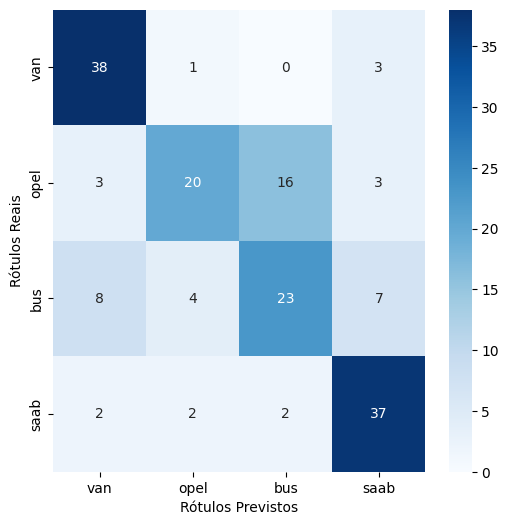

In [145]:

knn = neighbors.KNeighborsClassifier(n_neighbors=13, algorithm="auto") #Cria classificador (k vizinhos mais próximos = n_neighbors)
knn.fit(train_X, train_Y) #Treina o classificador c/ dados treinamento. train_X: atributos de treinamento; train_Y: rótulos (classe flores) correspondentes

resultKNN = knn.predict(test_X)

print("Acurácia: %0.2f\n" % (metrics.accuracy_score(test_Y, resultKNN)))
plot_heatmap(test_Y, resultKNN, ['van', 'opel', 'bus', 'saab'])


Conclusao: utilizando as devidas praticas de pre-processamento obtivemos uma acuracia de 70%.
# 2. Compare a acuracia de Naive Bayes e  Regressão Logística e plote o heatmap

Acurácia RL:  0.6449704142011834


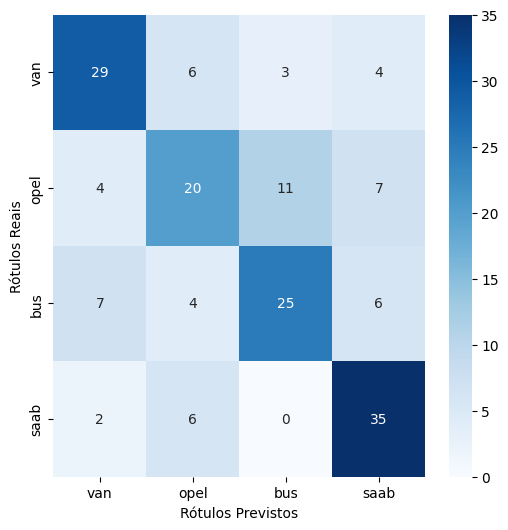

In [146]:
# Regressao Logistica
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
model.fit(train_X, train_Y)

pred_Y = model.predict(test_X)

print('Acurácia RL: ', model.score(test_X, test_Y))
plot_heatmap(test_Y, pred_Y, ['van', 'opel', 'bus', 'saab'])

Accuracy Bayes:  0.621301775147929


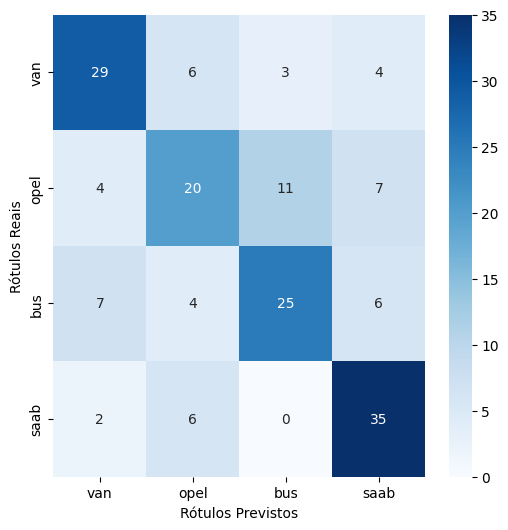

In [147]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import cluster, neighbors, svm, metrics, preprocessing

model = GaussianNB()
model.fit(train_X, train_Y)

y_pred = model.predict(test_X)

print('Accuracy Bayes: ', model.score(test_X, test_Y))
plot_heatmap(test_Y, pred_Y, ['van', 'opel', 'bus', 'saab'])

Conclusao: podemos reparar que ambos sao piores que o KNN, porem o modelo de regressao logistica obteve melhore resultados que o Bayes.

# 3. Considerando KNN e iris.csv:

  a) No codigo apresentado em aula, primeiramente o numero de vizinhos era 1. conforme esse numero aumenta a acurácia do modelo deve aumentar (até um ponto ótimo).
  Este parametro é responsavel pelo numero de vizinhos que serao comparados com o objeto atual durante o treinamento do modelo.

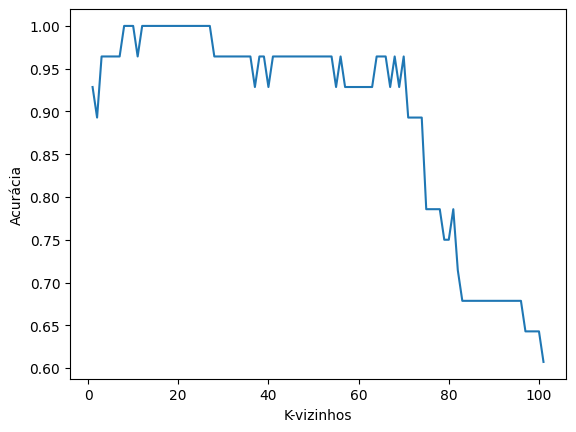

8
9
10
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [163]:
file_path = '/content/drive/MyDrive/csv/iris.csv'
df=pd.read_csv(file_path)

# pre processamento da base
#df = pre_proc(df, 'species')

train_set, train_target, test_set, test_target = train_test(df,0.8,'species')

x_plt=[]  # i [1-100]
y_plt=[]  # acc
for i in range(101):
  x_plt.append(i+1)
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1, algorithm="auto") #Cria classificador (k vizinhos mais próximos = n_neighbors)
  knn.fit(train_set, train_target) #Treina o classificador c/ dados treinamento. train_set: atributos de treinamento; train_target: rótulos (classe flores) correspondentes

  resultKNN = knn.predict(test_set)

  parcial_acc = metrics.accuracy_score(test_target, resultKNN)
  y_plt.append(parcial_acc)

plt.plot(x_plt, y_plt)
plt.ylabel("Acurácia")
plt.xlabel("K-vizinhos")
plt.show()

# verifica o k exato onde acuracia bate 1.0!
ideal=0
for i in y_plt:
  if(i == 1):
    print(ideal+1)
  ideal+=1

Observando o grafico gerado, podemos afirmar que o ponto de otimo do modelo (nesse caso nao é um unico ponto) esta entre 8-27 vizinhos (menos o 11!?).

b) no grafico referido as bolinhas azuis informam os valores reais esperados, enquanto os 'X's vermelhos são as respostas que o modelo previu.


Acurácia RL:  1.0


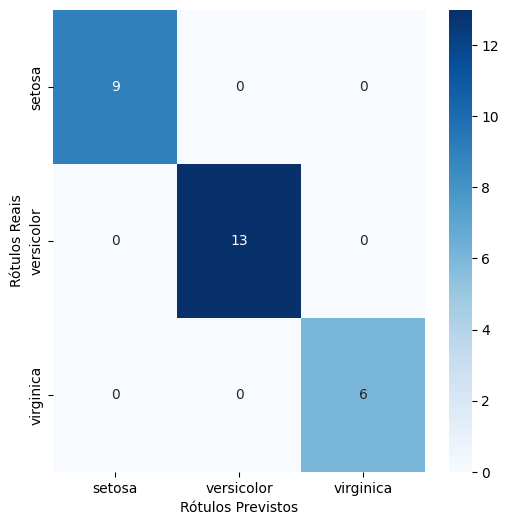

In [142]:
# Resultados para a questao c)

# Regressao Logistica

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
model.fit(train_set, train_target)

pred_Y = model.predict(test_set)
print('Acurácia RL: ', model.score(test_set, test_target))

plot_heatmap(test_target, pred_Y, ['setosa', 'versicolor', 'virginica'])



Accuracy Bayes:  0.9285714285714286


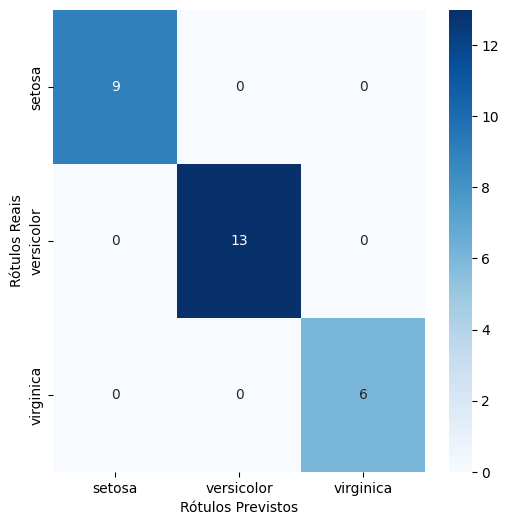

In [143]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn import cluster, neighbors, svm, metrics, preprocessing

model = GaussianNB()
model.fit(train_set, train_target)

y_pred = model.predict(test_set)
print('Accuracy Bayes: ', model.score(test_set, test_target))

plot_heatmap(test_target, pred_Y, ['setosa', 'versicolor', 'virginica'])

c) comparar acuracia em RL, KNN e Naive Bayes

  KNN -> bateu 100% em k=11

  RL -> bateu 100% de primeira

  Naive Bayes -> bateu 92% com o modelo gaussiano

  dados estes numeros interpreto que o modelo mais eficiente foi o Regresssa Logistica que bateu 100% de primeira.

# 4. Elbow -> quantidade de clusters -> K-means hierarquico

In [149]:
file_path = '/content/drive/MyDrive/csv/vehicle.csv'
df=pd.read_csv(file_path)
# colunas selecionadas = ['Circ', 'Comp', 'D.Circ', 'Pr.Axis.Rect', 'Sc.Var.maxis']
df = column_select(df,['Comp', 'Circ', 'D.Circ','Pr.Axis.Rect', 'Sc.Var.maxis', 'Class'])

# pre processamento da base
#df = pre_proc(df, 'Class')
#print(df)

# separa conjuntos train e test
train_X, train_Y, test_X, test_Y = train_test(df, 0.8, 'Class')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Método Elbow')

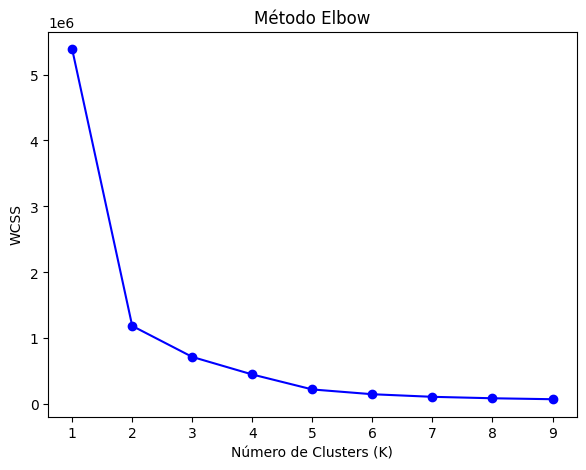

In [152]:
#importa K-means
from sklearn.cluster import KMeans

# Calcula o WCSS para diferentes valores de K
WCSS = [] #lista vazia
K = range(1, 10)

# Roda o K-means k vezes
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(test_X) # aplica k-means p/ gerar os clusters
    WCSS.append(kmeans.inertia_)

# Mostra os resultados do método Elbow
plt.figure(figsize=(15, 5))

# Gráfico do Método Elbow
plt.subplot(1, 2, 1)
plt.plot(K, WCSS, '-bo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.title('Método Elbow')

Número de clusters ideal é 2!

In [151]:
from sklearn.metrics import silhouette_score

# Realiza nova clusterização usando K-means
k = 2  # Número de clusters (obtido do método Ewbol)
kmeans = KMeans(n_clusters=k, random_state=1)
y_km = kmeans.fit_predict(train_X) # Realiza a predição
centers = kmeans.cluster_centers_

# acurácia
silhouette_score(train_X, kmeans.labels_, metric='euclidean')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7197431355731309

# 5. Divida a base Vehicles em train e test  -> arvore de decisao baseado em gini -> acurácia

Acurácia Árvore:  0.727810650887574


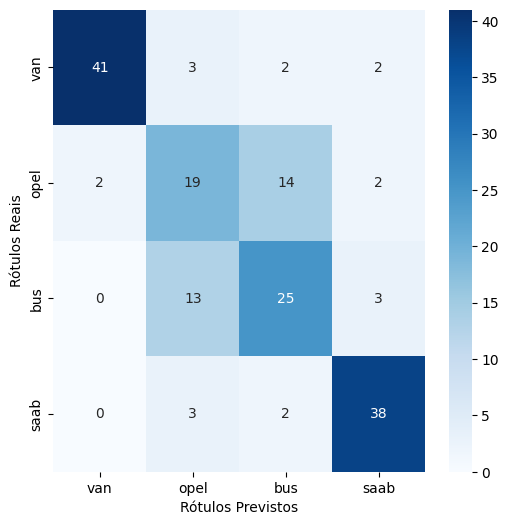

In [157]:
file_path = '/content/drive/MyDrive/csv/vehicle.csv'
df=pd.read_csv(file_path)


# pre processamento da base
#df = pre_proc(df, 'Class')

train_X, train_Y, test_X,  test_Y = train_test(df, 0.8, 'Class')

#Construção da árvore assumindo como medida o coef. Gini
from sklearn import tree

#Cria um modelo de AD + medida gini de seleção de nós
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 2)

#Fita o modelo a partir dos dados de treinamento
model.fit(train_X, train_Y)

#Calcula as predições para os dados de teste
y_pred = model.predict(test_X)

print('Acurácia Árvore: ', model.score(test_X, test_Y))

plot_heatmap(test_Y, y_pred, ['van', 'opel', 'bus', 'saab'])


# 6. Avalie a acuracia no Random Forest variando de 1-100 estimadores

Melhor valor de n: 28  com acurácia: 0.8106508875739645


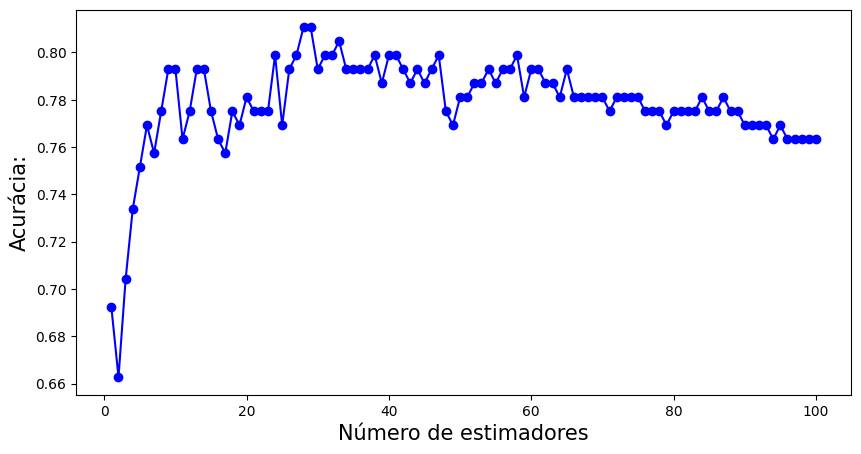

In [160]:
file_path = '/content/drive/MyDrive/csv/vehicle.csv'
df=pd.read_csv(file_path)
train_X, train_Y, test_X,  test_Y = train_test(df, 0.8, 'Class')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
vscore = []
vn = []
for n in range(1,101):
    model = RandomForestClassifier(n_estimators=n, random_state=1)
    model.fit(train_X,train_Y)
    y_pred = model.predict(test_X)
    score = accuracy_score(y_pred, test_Y)
    #print('Número de estimadores:', n, 'Acurácia:', score)
    vscore.append(score)
    vn.append(n)

best_n = vn[np.argmax(vscore)]
print('Melhor valor de n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Número de estimadores', fontsize = 15)
plt.ylabel('Acurácia:', fontsize = 15)
plt.show()

Conclusão: a acurácia para 100 estimadores foi de 76,9%. verificando o gráfico de acurácia por n_estimadores podemos afirmar que o numero que gera a maior eficiencia é de 28 estimadores com acurácia de 81,0%, considerando random_state =1